<a href="https://colab.research.google.com/github/manoj07d/Machine-Learning-Projects/blob/main/ML_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset for training the model

In [43]:
url = 'https://raw.githubusercontent.com/manoj07d/Machine-Learning-Projects/main/Linear%20Regression/Housing%20Price%20predict/home_prices_train.csv'
df = pd.read_csv(url)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## Plotting Regression line through points

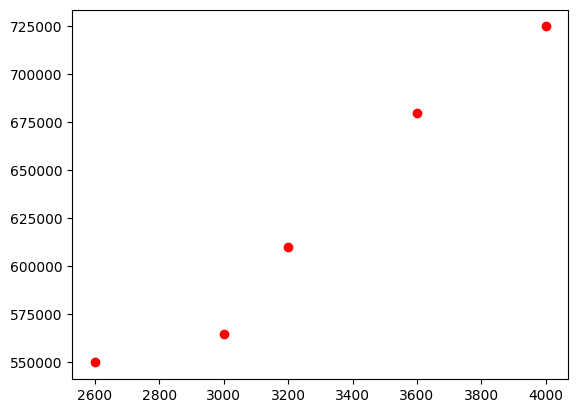

In [25]:
plt.scatter(df.area, df.price, color='red')
plt.xlabel = 'Area'
plt.ylabel = 'Price'
plt.show()

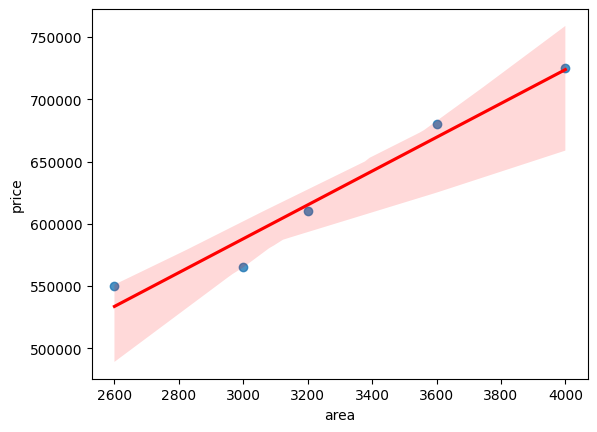

In [39]:
sns.regplot(
    x=df["area"],
    y=df["price"],
    line_kws={"color": "r"}
)
plt.show()

## Splitting data into feature and labels

In [34]:
x_area_df = df.drop('price', axis = 1)
x_area_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


## Creating a Linear Regression model

In [40]:
model = linear_model.LinearRegression()

## Training the model

In [41]:
model.fit(x_area_df, df.price)  #fit(x,y)

LinearRegression()

## **Model prediction test1 with a single feature value**

In [45]:
model.predict([[5000]])   #2D array

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [63]:
model.coef_   # slope m

array([135.78767123])

In [64]:
model.intercept_    # intercept b

180616.43835616432

In [65]:
# y = mx + b
y = 5000 * model.coef_ + model.intercept_
print(y)

[859554.79452055]


## **Model prediction test2 with a dataset of Areas**

In [47]:
url = 'https://raw.githubusercontent.com/manoj07d/Machine-Learning-Projects/main/Linear%20Regression/Housing%20Price%20predict/home_areas_test.csv'
test_df = pd.read_csv(url)
test_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [48]:
p = model.predict(test_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

## Building the **House Area : Predicted Price** dataset

In [54]:
test_df['prices'] = np.round(p,2)
test_df

,area,prices
0,1000,316404.11
1,1500,384297.95
2,2300,492928.08
3,3540,661304.79
4,4120,740061.64
5,4560,799808.22
6,5490,926090.75
7,3460,650441.78
8,4750,825607.88
9,2300,492928.08


In [67]:
test_df.to_csv('predicted_prices.csv', index = False)
